In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
# Ignore warnings

import warnings
warnings.filterwarnings("ignore") # Warning will make operation confuse!!!

YOLO_DIR = os.path.join('models','yolov5')
WEIGHTS_DIR = os.path.join('best.pt')

In [5]:
!git clone https://github.com/ultralytics/yolov5.git {YOLO_DIR}

Cloning into 'models/yolov5'...
remote: Enumerating objects: 12164, done.
remote: Total 12164 (delta 0), reused 0 (delta 0), pack-reused 12164
Receiving objects: 100% (12164/12164), 11.93 MiB | 7.86 MiB/s, done.
Resolving deltas: 100% (8425/8425), done.


In [18]:
model = torch.hub.load(
    YOLO_DIR,
    'custom',
    path=WEIGHTS_DIR, 
    source='local',
    device = 'cpu',
    force_reload=True
) 

YOLOv5 🚀 2022-6-1 Python-3.7.13 torch-1.7.0 CPU

Fusing layers... 
custom_YOLOv5s summary: 232 layers, 7246518 parameters, 0 gradients
Adding AutoShape... 


In [15]:
img = 'pig-gty-er-220319_1647715358563_hpMain_16x9_992.jpg'
img = cv2.imread(img)
results = model(img)
results.pred

[tensor([[ 79.42395, 113.68162, 364.96075, 381.72455,   0.91236,   0.00000],
         [364.39340,  71.92290, 561.62823, 342.27600,   0.88384,   0.00000],
         [634.93927,  74.19855, 841.86707, 383.77826,   0.84872,   0.00000]])]

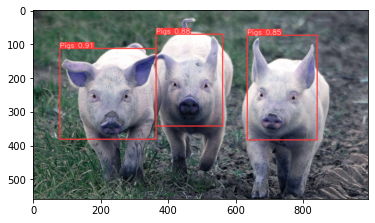

In [13]:
%matplotlib inline 
example = np.squeeze(results.render())
plt.imsave('example.jpg',example )
plt.imshow(example)
plt.show()